### About Dataset
Context
Is the movie industry dying? is Netflix the new entertainment king? Those were the first questions that lead me to create a dataset
focused on movie revenue and analyze it over the last decades. But, why stop there? There are more factors that intervene in this
kind of thing, like actors, genres, user ratings and more. And now, anyone with experience (you) can ask specific questions about the
movie industry, and get answers.

Content
There are 6820 movies in the dataset (220 movies per year, 1986-2016). Each movie has the following attributes:

budget: the budget of a movie. Some movies don't have this, so it appears as 0

company: the production company

country: country of origin

director: the director

genre: main genre of the movie.

gross: revenue of the movie






In [7]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
movie_analysis = pd.read_csv(r'C:\Users\HomePC\Downloads\movies.csv.zip')

In [9]:
# Now let's take a look at the data

movie_analysis.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

In [11]:


for col in movie_analysis.columns:
    pct_missing = np.mean(movie_analysis[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [13]:
movie_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Assign the result to a new DataFrame or overwrite the originalpythonCopyEdit
# option1.

In [15]:


movie_analysis = movie_analysis.fillna({
    'score': 0,
    'votes': 0,
    'rating': 'Unknown',
    'released': 'Unknown',
    'writer': 'Unknown',
    'star': 'Unknown',
    'country': 'Unknown',
    'budget': 0,
    'gross': 0,
    'company': 'Unknown',
    'runtime': 0
})

movie_analysis.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7668 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7668 non-null   object 
 5   score     7668 non-null   float64
 6   votes     7668 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7668 non-null   object 
 9   star      7668 non-null   object 
 10  country   7668 non-null   object 
 11  budget    7668 non-null   float64
 12  gross     7668 non-null   float64
 13  company   7668 non-null   object 
 14  runtime   7668 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Option 2: Use inplace=True (no need to reassign)

movie_analysis.fillna({
    'score': 0,
    'votes': 0,
    'rating': 'Unknown',
    'released': 'Unknown',
    'writer': 'Unknown',
    'star': 'Unknown',
    'country': 'Unknown',
    'budget': 0,
    'gross': 0,
    'company': 'Unknown',
    'runtime': 0
}, inplace=True)

movie_analysis.info()


In [93]:
# Data Types for our columns

print(movie_analysis.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [ ]:
# change datatype of  columns


In [17]:
movie_analysis['budget']= movie_analysis['budget'].astype('int64')

movie_analysis['gross']= movie_analysis['gross'].astype('int64')

In [11]:
movie_analysis.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [13]:
# incase the year and release year are not correspond then use this code
movie_analysis['yearcorrect']= movie_analysis['released'].astype(str).str[:4]
movie_analysis.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July


In [16]:
# import pandas as pd
pd.set_option('display.max_rows', None)


In [18]:
# Order our Data a little bit to see

movie_analysis = movie_analysis.sort_values(by=['gross'], inplace=False, ascending=False)

movie_analysis.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,Apri


In [21]:
# working on duplicate values both on column and entire rows

In [63]:
# for the column
movie_analysis['company'].drop_duplicates().sort_values(ascending= False)

7129    2385
5664    2384
6412    2383
4007    2382
6793    2381
6420    2380
3776    2379
524     2378
3330    2377
146     2376
2213    2375
6222    2374
3368    2373
535     2372
5180    2371
3193    2370
1321    2369
1329    2368
789     2367
5125    2366
5499    2365
4618    2364
4990    2363
5410    2362
7576    2361
3310    2360
6798    2359
6265    2358
4392    2357
4999    2356
425     2355
712     2354
3158    2353
3637    2352
2173    2351
4272    2350
450     2349
3624    2348
3943    2347
2084    2346
818     2345
2355    2344
6606    2343
5276    2342
7032    2341
4863    2340
2194    2339
4572    2338
6616    2337
1306    2336
1475    2335
5715    2334
1421    2333
1744    2332
1304    2331
7225    2330
5496    2329
6672    2328
5395    2327
4557    2326
4505    2325
7267    2324
2284    2323
6578    2322
317     2321
0       2320
7401    2319
40      2318
403     2317
117     2316
5075    2315
729     2314
4975    2313
6166    2312
5272    2311
5409    2310
7625    2309

In [20]:

# for the entire column
movie_analysis = movie_analysis.drop_duplicates()
movie_analysis.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,Apri


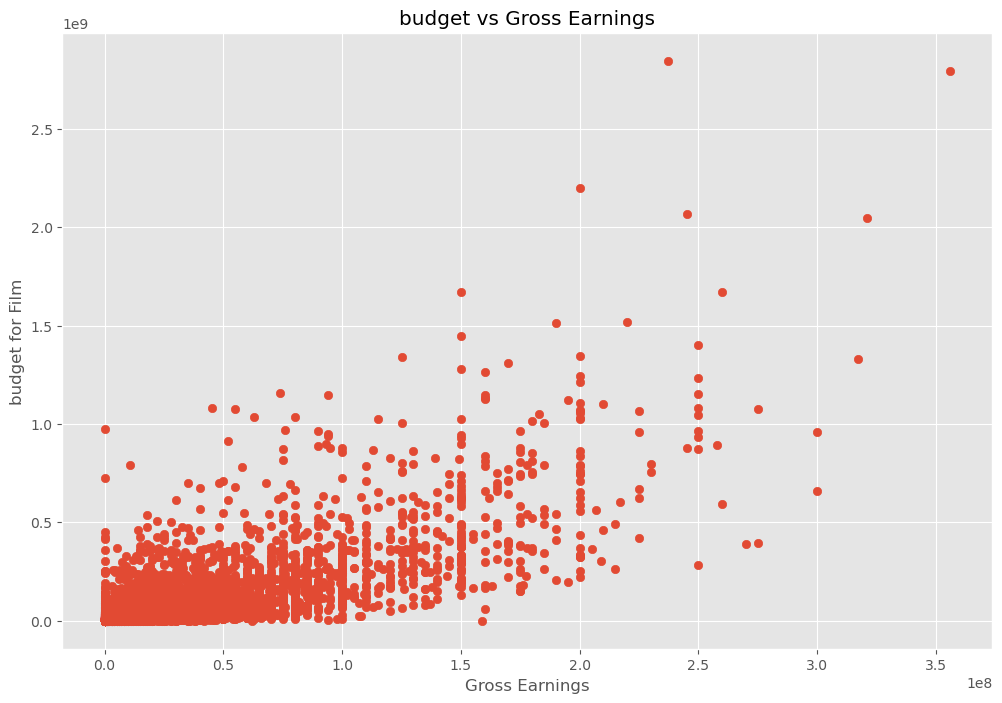

In [67]:
# scatter plot with burget vs gross
plt.scatter(x=movie_analysis['budget'], y=movie_analysis['gross'])

plt.title('budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('budget for Film')

plt.show()


In [69]:
movie_analysis.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2320,146.0,14
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,13
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,14
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,13
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,13


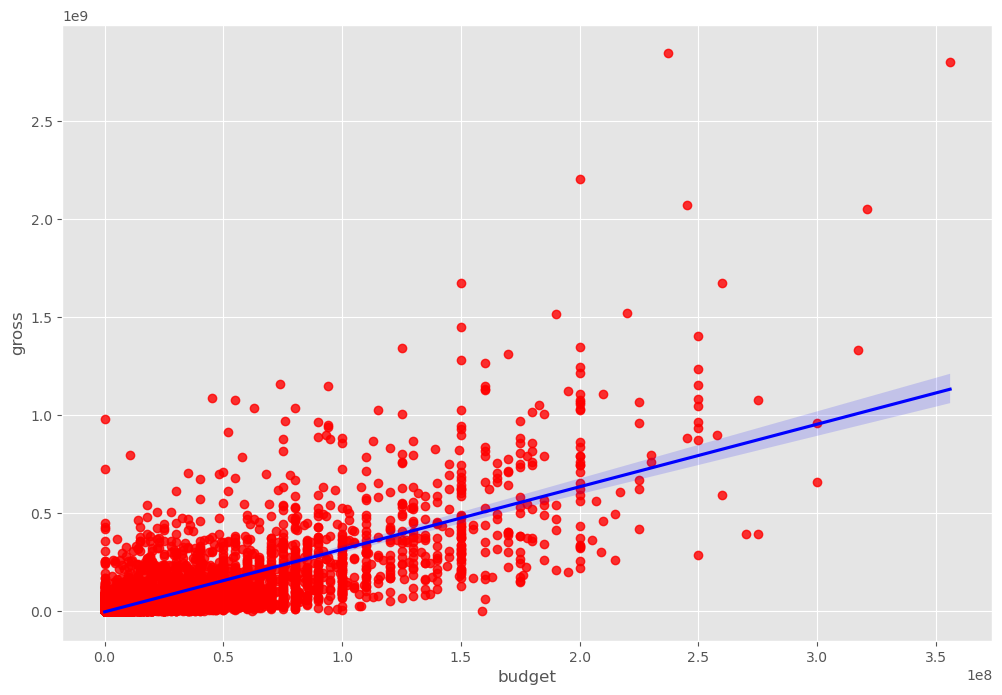

In [71]:

# plot budget vs gross using saeborn

sns.regplot(x="budget", y="gross", data=movie_analysis, scatter_kws={"color": "red"}, line_kws={"color":"blue"})
plt.show()

In [ ]:
# let start looking at correlation
# type of correlation: pearson, kendall, spearman

In [73]:
movie_analysis.select_dtypes(include='number').corr(method='pearson')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.012206,0.016355,0.011453,-0.010480,0.016377,0.013038,0.009079,0.009985,0.006844,-0.010359,0.020548,0.006989,0.010373,0.008483,-0.011725
rating,-0.012206,1.000000,0.136127,0.033801,0.025526,0.013917,-0.004429,0.011951,-0.001610,0.001063,-0.011793,-0.141632,-0.131883,-0.092284,0.054119,0.022426
genre,0.016355,0.136127,1.000000,-0.081261,0.030429,0.027384,-0.145296,-0.015258,0.006747,-0.004641,-0.035783,-0.334021,-0.234297,-0.070032,-0.052914,0.028397
year,0.011453,0.033801,-0.081261,1.000000,0.000077,0.092616,0.222427,-0.020795,-0.007930,-0.027912,-0.069590,0.309212,0.261900,-0.011425,0.116358,-0.001562
released,-0.010480,0.025526,0.030429,0.000077,1.000000,0.039182,0.015935,-0.001526,-0.003707,0.015474,-0.021707,0.008552,0.000100,-0.007634,-0.000281,0.995320
score,0.016377,0.013917,0.027384,0.092616,0.039182,1.000000,0.407101,0.010568,0.022475,0.000823,-0.134439,0.056863,0.186012,-0.005964,0.394564,0.037905
votes,0.013038,-0.004429,-0.145296,0.222427,0.015935,0.407101,1.000000,0.000349,0.000487,-0.019380,0.073424,0.486931,0.632870,0.130535,0.306984,0.017107
director,0.009079,0.011951,-0.015258,-0.020795,-0.001526,0.010568,0.000349,1.000000,0.299523,0.039875,0.018014,0.004976,-0.014916,0.004248,0.017062,-0.000105
writer,0.009985,-0.001610,0.006747,-0.007930,-0.003707,0.022475,0.000487,0.299523,1.000000,0.028887,0.014490,-0.026777,-0.022963,0.001729,-0.004213,-0.004193
star,0.006844,0.001063,-0.004641,-0.027912,0.015474,0.000823,-0.019380,0.039875,0.028887,1.000000,-0.015101,-0.020228,-0.001326,0.007918,0.008216,0.015093


In [75]:
# i want to check high correlation btw budget and gross

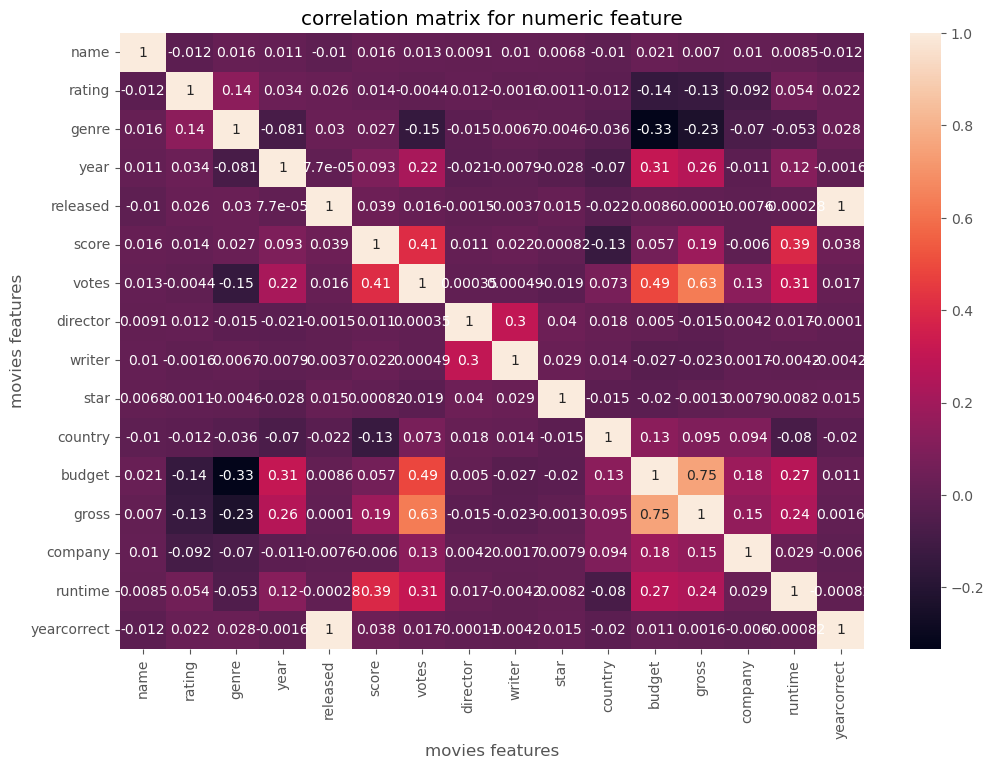

In [77]:
correlation_matrix = movie_analysis.select_dtypes(include='number').corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix for numeric feature')
plt.xlabel('movies features')
plt.ylabel('movies features')


plt.show()

In [79]:
# lets look at the country
movie_analysis.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2320,146.0,14
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,13
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,14
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,13
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,13


In [49]:
movie_analysis_numerized = movie_analysis

for col_name in movie_analysis_numerized.columns:
    if(movie_analysis_numerized[col_name].dtype=='object'):
        movie_analysis_numerized[col_name]= movie_analysis_numerized[col_name].astype('category')
        movie_analysis_numerized[col_name]= movie_analysis_numerized[col_name].cat.codes

movie_analysis_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2320,146.0,14
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,13
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,14
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,13
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,10,6,2020,2964,3.1,18.0,1500,2289,2421,55,7000,0,2283,90.0,18
7664,1678,10,4,2020,1107,4.7,36.0,774,2614,1886,55,0,0,539,90.0,11
7665,4717,10,6,2020,193,5.7,29.0,2061,2683,2040,55,58750,0,941,0.0,8
7666,2843,10,6,2020,2817,0.0,0.0,1184,1824,450,55,15000,0,2283,120.0,18


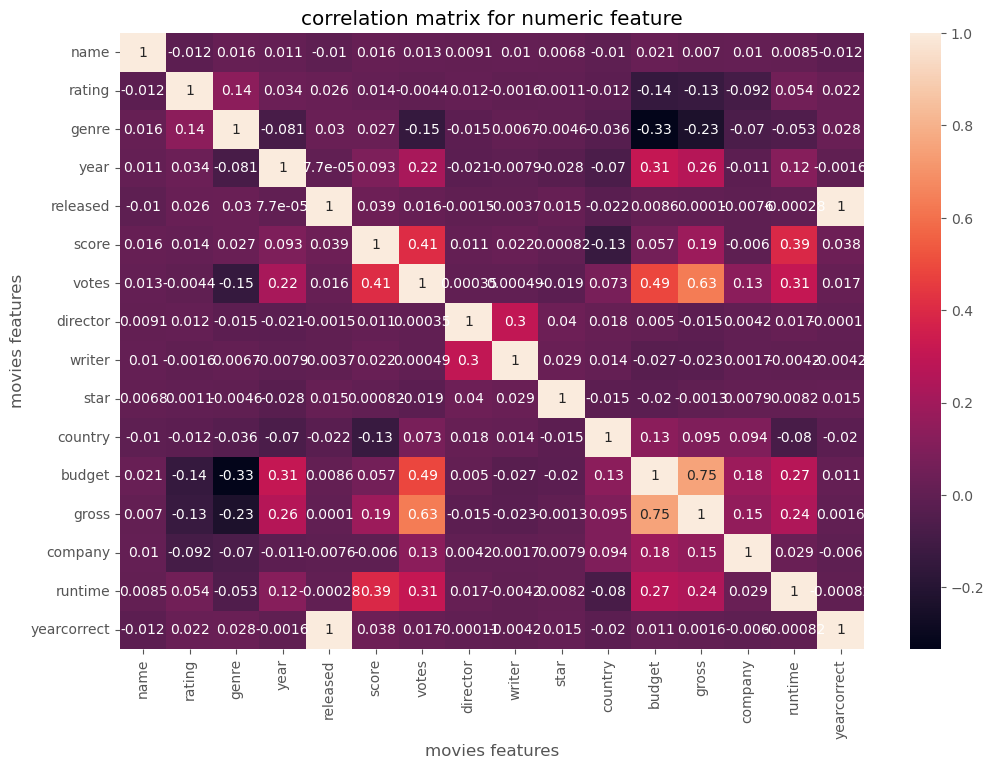

In [51]:
correlation_matrix = movie_analysis_numerized.select_dtypes(include='number').corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation matrix for numeric feature')
plt.xlabel('movies features')
plt.ylabel('movies features')


plt.show()

In [53]:
movie_analysis_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.012206,0.016355,0.011453,-0.010480,0.016377,0.013038,0.009079,0.009985,0.006844,-0.010359,0.020548,0.006989,0.010373,0.008483,-0.011725
rating,-0.012206,1.000000,0.136127,0.033801,0.025526,0.013917,-0.004429,0.011951,-0.001610,0.001063,-0.011793,-0.141632,-0.131883,-0.092284,0.054119,0.022426
genre,0.016355,0.136127,1.000000,-0.081261,0.030429,0.027384,-0.145296,-0.015258,0.006747,-0.004641,-0.035783,-0.334021,-0.234297,-0.070032,-0.052914,0.028397
year,0.011453,0.033801,-0.081261,1.000000,0.000077,0.092616,0.222427,-0.020795,-0.007930,-0.027912,-0.069590,0.309212,0.261900,-0.011425,0.116358,-0.001562
released,-0.010480,0.025526,0.030429,0.000077,1.000000,0.039182,0.015935,-0.001526,-0.003707,0.015474,-0.021707,0.008552,0.000100,-0.007634,-0.000281,0.995320
score,0.016377,0.013917,0.027384,0.092616,0.039182,1.000000,0.407101,0.010568,0.022475,0.000823,-0.134439,0.056863,0.186012,-0.005964,0.394564,0.037905
votes,0.013038,-0.004429,-0.145296,0.222427,0.015935,0.407101,1.000000,0.000349,0.000487,-0.019380,0.073424,0.486931,0.632870,0.130535,0.306984,0.017107
director,0.009079,0.011951,-0.015258,-0.020795,-0.001526,0.010568,0.000349,1.000000,0.299523,0.039875,0.018014,0.004976,-0.014916,0.004248,0.017062,-0.000105
writer,0.009985,-0.001610,0.006747,-0.007930,-0.003707,0.022475,0.000487,0.299523,1.000000,0.028887,0.014490,-0.026777,-0.022963,0.001729,-0.004213,-0.004193
star,0.006844,0.001063,-0.004641,-0.027912,0.015474,0.000823,-0.019380,0.039875,0.028887,1.000000,-0.015101,-0.020228,-0.001326,0.007918,0.008216,0.015093


In [81]:
correlation_mat = movie_analysis_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs


name         name           1.000000
             rating        -0.012206
             genre          0.016355
             year           0.011453
             released      -0.010480
             score          0.016377
             votes          0.013038
             director       0.009079
             writer         0.009985
             star           0.006844
             country       -0.010359
             budget         0.020548
             gross          0.006989
             company        0.010373
             runtime        0.008483
             yearcorrect   -0.011725
rating       name          -0.012206
             rating         1.000000
             genre          0.136127
             year           0.033801
             released       0.025526
             score          0.013917
             votes         -0.004429
             director       0.011951
             writer        -0.001610
             star           0.001063
             country       -0.011793
 

In [83]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.234297
gross        genre         -0.234297
votes        genre         -0.145296
genre        votes         -0.145296
budget       rating        -0.141632
rating       budget        -0.141632
country      score         -0.134439
score        country       -0.134439
gross        rating        -0.131883
rating       gross         -0.131883
company      rating        -0.092284
rating       company       -0.092284
year         genre         -0.081261
genre        year          -0.081261
runtime      country       -0.079918
country      runtime       -0.079918
company      genre         -0.070032
genre        company       -0.070032
year         country       -0.069590
country      year          -0.069590
runtime      genre         -0.052914
genre        runtime       -0.052914
country      genre         -0.035783
genre        country       -0.035783
year         star          -0.027912
s

In [85]:
High_corr = sorted_pairs[(sorted_pairs) > 0.5]

High_corr

gross        votes          0.632870
votes        gross          0.632870
gross        budget         0.750157
budget       gross          0.750157
released     yearcorrect    0.995320
yearcorrect  released       0.995320
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# in conclusion, votes and budget have a highest correlation to gross earnings
# company has low correlation